In [68]:
# Project Title Next Movie Production
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [69]:
# Q1 Actors and their correlation to a movie's success
#Ideas:
    # Top 10-20 Actors based on Movie revenue
    # Top 10-20 Actors based on Ratings
    # Is there a Lead Actor that starred in more than 1 Movie that is part of the Top 100 Movies based on revenue
    # Highest number of Movies that Actor is part of and average revenue across all movies

#Read the CSV and create first dataframe
df = pd.read_csv("../Cleaned Data/cleaned_movie_data.csv")
df.head()

,Movie ID,Title,Average Rating (Out of 10),Number of User Ratings,TMDb Popularity Score,Gross Revenue,Net Revenue,Net Revenue (% Over Budget),Budget,Release Date,...,Genre 3,Genre 4,Genre 5,Runtime (Minutes),1st Billing,2nd Billing,3rd Billing,4th Billing,5th Billing,Director
0,11688,The Emperor's New Groove,7.5,6007,86.051,169327687,69327687,0.693277,100000000,2000-12-15,...,Comedy,Family,Fantasy,78,David Spade,John Goodman,Eartha Kitt,Patrick Warburton,Wendie Malick,Mark Dindal
1,4247,Scary Movie,6.3,6247,88.909,278019771,259019771,13.632620,19000000,2000-07-07,...,NaN,NaN,NaN,88,Anna Faris,Jon Abrahams,Marlon Wayans,Shawn Wayans,Regina Hall,Keenen Ivory Wayans
2,9600,Big Momma's House,5.8,2096,81.102,173959438,143959438,4.798648,30000000,2000-05-31,...,NaN,NaN,NaN,98,Martin Lawrence,Nia Long,Paul Giamatti,Jascha Washington,Terrence Howard,Raja Gosnell
3,98,Gladiator,8.2,16708,67.513,465361176,362361176,3.518070,103000000,2000-05-04,...,Adventure,NaN,NaN,155,Russell Crowe,Joaquin Phoenix,Connie Nielsen,Oliver Reed,Richard Harris,Ridley Scott
4,955,Mission: Impossible II,6.1,5985,64.994,546388105,421388105,3.371105,125000000,2000-05-24,...,Thriller,NaN,NaN,123,Tom Cruise,Dougray Scott,Thandiwe Newton,Ving Rhames,Richard Roxburgh,John Woo


In [118]:
#Top 10-20 Actors based on Movie revenue
actor_rev = df[["Gross Revenue", "1st Billing", "Title"]]

#Sort to highest revenue
top_actor_rev = actor_rev.sort_values("Gross Revenue", ascending=False).head(20)
top_actor_rev = top_actor_rev[["1st Billing", "Gross Revenue"]]
top_actor_rev.set_index("1st Billing", inplace=True)
top_actor_rev

# x = np.arange(len(top_actor_rev))
# tic_loc = [value for value in x]

# plt.bar(x, top_actor_rev["Net Revenue"], align='center')
# plt.xticks(tic_loc, top_actor_rev["1st Billing"], rotation="vertical")
# plt.xlabel("Lead Actor")
# plt.ylabel("Revenue in Billion Dollars")
# plt.title("Top Movie Revenue and Lead Actor")
# plt.yscale("linear")
# plt.grid(alpha=.2)

# plt.show()



,Gross Revenue
1st Billing,
Sam Worthington,2923706026
Robert Downey Jr.,2794731755
Sam Worthington,2320250281
Harrison Ford,2068223624
Robert Downey Jr.,2052415039
Tom Holland,1921847111
Chris Pratt,1671537444
Chiwetel Ejiofor,1663075401
Robert Downey Jr.,1518815515


In [97]:
# Top 10-20 Actors based on Ratings
actor_rate = df[["Average Rating (Out of 10)", "1st Billing", "Title"]]

#sort to highest rating
top_actor_rate = actor_rate.sort_values("Average Rating (Out of 10)", ascending=False)
top_actor_rate.head(20)

#Create rating graph - actor by rating and written anaylysis to compare

,Average Rating (Out of 10),1st Billing,Title
78,8.5,Rumi Hiiragi,Spirited Away
747,8.5,Christian Bale,The Dark Knight
2142,8.5,Song Kang-ho,Parasite
240,8.5,Elijah Wood,The Lord of the Rings: The Return of the King
158,8.4,Viggo Mortensen,The Lord of the Rings: The Two Towers
332,8.4,Chieko Baisho,Howl's Moving Castle
1451,8.4,Matthew McConaughey,Interstellar
978,8.4,Leonardo DiCaprio,Inception
168,8.4,Alexandre Rodrigues,City of God
167,8.4,Adrien Brody,The Pianist


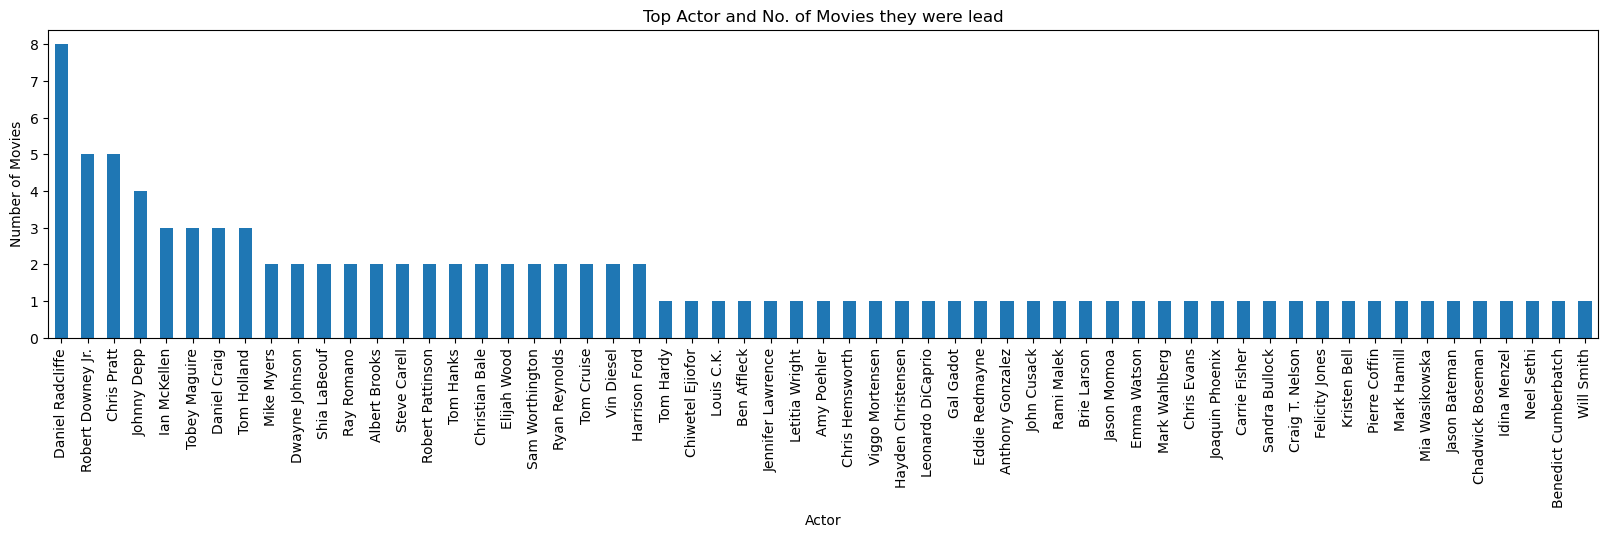

In [119]:
# Is there an Lead Actor that starred in more than 1 Movie that is part of the Top 100 Movies based on revenue
#Sort to highest revenue
top_100_rev = actor_rev.sort_values("Gross Revenue", ascending=False).head(100)

#Count Recurring Lead Actor

topactor = top_100_rev["1st Billing"].value_counts()
topactor
fig = topactor.plot(kind = 'bar', figsize = (20, 4), 
                    title="Top Actor and No. of Movies they were lead", 
                    xlabel="Actor", 
                    ylabel="Number of Movies")
labels = topactor.index

In [ ]:
# Q2 Movie rating's correlation to Directors

# Do Director's have "Actor Favorites" and worked with certain Actor multiple times (disregarding franchise) and is included in the Top 100 movies?
    

In [117]:
# Top 10-20 Directors based on Movie revenue
director_rev = df[["Gross Revenue", "Director", "Title"]]
#Sort to highest revenue
top_dir_rev = director_rev.sort_values("Gross Revenue", ascending=False).head(20)
top_dir_rev.set_index("Director", inplace=True)
top_dir_rev

,Gross Revenue,Title
Director,,
James Cameron,2923706026,Avatar
Anthony Russo,2794731755,Avengers: Endgame
James Cameron,2320250281,Avatar: The Way of Water
J.J. Abrams,2068223624,Star Wars: The Force Awakens
Anthony Russo,2052415039,Avengers: Infinity War
Jon Watts,1921847111,Spider-Man: No Way Home
Colin Trevorrow,1671537444,Jurassic World
Jon Favreau,1663075401,The Lion King
Joss Whedon,1518815515,The Avengers


In [99]:
# Top 20 Directors based on Ratings
    dir_rate = df[["Average Rating (Out of 10)", "Director", "Title"]]

#sort to highest rating
top_dir_rate = dir_rate.sort_values("Average Rating (Out of 10)", ascending=False)
top_dir_rate.head(20)

,Average Rating (Out of 10),Director,Title
78,8.5,Hayao Miyazaki,Spirited Away
747,8.5,Christopher Nolan,The Dark Knight
2142,8.5,Bong Joon-ho,Parasite
240,8.5,Peter Jackson,The Lord of the Rings: The Return of the King
158,8.4,Peter Jackson,The Lord of the Rings: The Two Towers
332,8.4,Hayao Miyazaki,Howl's Moving Castle
1451,8.4,Christopher Nolan,Interstellar
978,8.4,Christopher Nolan,Inception
168,8.4,Fernando Meirelles,City of God
167,8.4,Roman Polanski,The Pianist


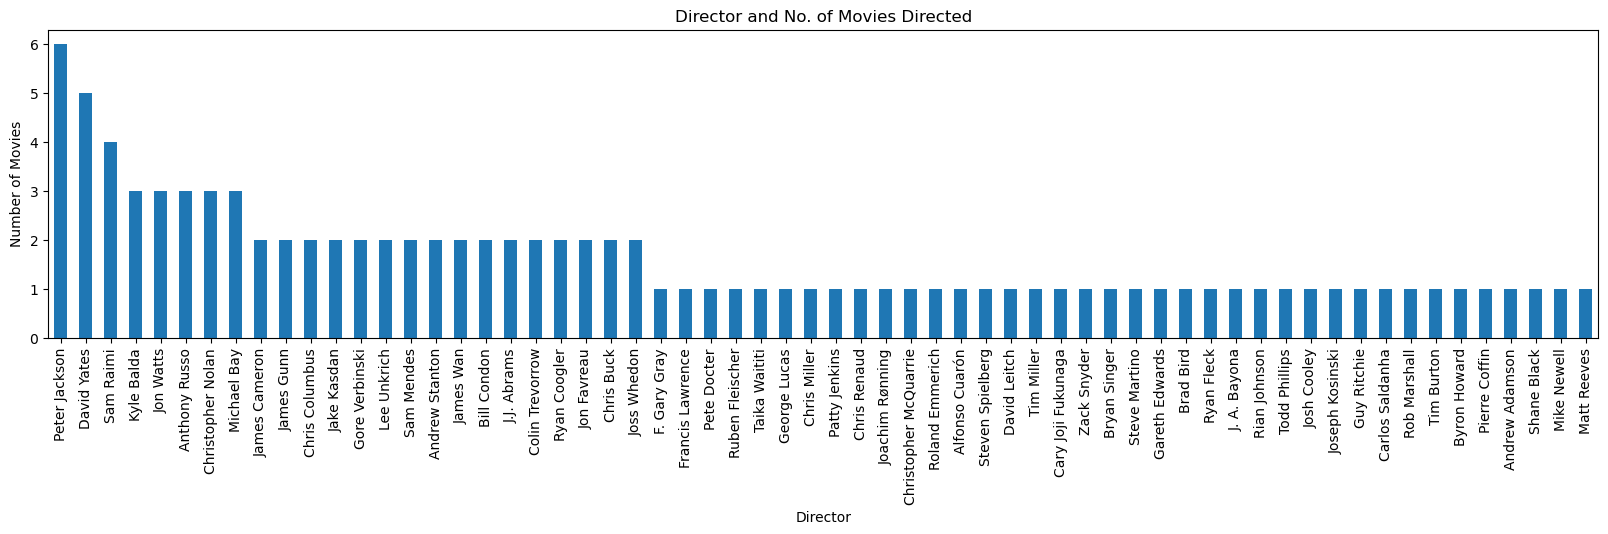

In [120]:
# Is there a Director who directed more than 1 Movie that is part of the Top 100 Movies based on revenue
top_100_rev = director_rev.sort_values("Gross Revenue", ascending=False).head(100)

#Count Recurring Lead Actor

top_dir = top_100_rev["Director"].value_counts()
top_dir
fig = top_dir.plot(kind = 'bar', figsize = (20, 4), 
                    title="Director and No. of Movies Directed", 
                    xlabel="Director", 
                    ylabel="Number of Movies")
labels = top_dir.index

In [1]:
# Q3 Movie rating's correlation to revenue
#Create a graph showing revenue and ratings by year
#Ideas:
    # Show Top 10 Movies with highest ratings and their revenue - answered in the graphs aboves
    # Is the movie with the highest rating, also have the highest revenue? - answered in the graphs aboves

    

In [121]:
   # What is the rating of the movie with the Lowest Revenue?
    
lowrev = df[["Title", "Gross Revenue"]]
lowest_rev = lowrev.sort_values("Gross Revenue").head(3)
lowest_rev = lowest_rev[["Title", "Gross Revenue"]]
lowest_rev.set_index("Title", inplace=True)
lowest_rev

,Gross Revenue
Title,
Kickboxer: Retaliation,4537
Area 51,7556
Overdrive,7793


In [122]:
  # What is the rating of the movie with the Highest Revenue?
highrev = df[["Title", "Gross Revenue"]]
highest_rev = highrev.sort_values("Gross Revenue", ascending=False).head(3)
highest_rev = highest_rev[["Title", "Gross Revenue"]]
highest_rev.set_index("Title", inplace=True)
highest_rev

,Gross Revenue
Title,
Avatar,2923706026
Avengers: Endgame,2794731755
Avatar: The Way of Water,2320250281


In [ ]:
#Create a graph showing relationship between revenue and ratings by director and actor


In [133]:
#Create a graph showing revenue and ratings by year (Revenue answered in batch 1)
rateyear_df = df[["Release Year", "Average Rating (Out of 10)"]].copy()

#Group the data by Year and run sum() method to obtain totals
group_year = rateyear_df.groupby(["Release Year"])
rate_by_year = group_year.mean()

#Build and show revenue by month averages based on rev_by_mnth 
year_labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006",
                "2007", "2008", "2009", "2010", "2011", "2012", "2013",
              "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]

# x = np.arange(len(rate_by_year))
# plt.bar(x, rate_by_year["Gross Revenue"])
# plt.xticks(x, year_labels, rotation="vertical")
# plt.xlabel("Year")
# plt.ylabel("Movie Rating")
# plt.title("Box Office Revenue")

# plt.grid(alpha=.2)
# plt.show()